# Load CSV From Label Studio

In [1]:
import csv

with open('C:/Users/faith/Downloads/project-1-at-2023-03-22-21-57-a3af2af3.csv', encoding='utf-8') as file:
    dataset_csv_reader =  csv.reader(file)
    
    # Get headers
    header = []
    header = next(dataset_csv_reader)

    #Extract tweets into list
    tweets_list = []
    for row in dataset_csv_reader:
        if len(row) >= 2:
            tweets_list.append(row[1])
    
    #Print first 3 entries
    for tweet in tweets_list[:3]:
        print(f'---- {tweet}')


----  Can I know wen r you gonna reply.  I called up ur cust care sum days bk n dey asked me 2 send an email 2 contact.in since it's related 2 offers.  I send dem an email n 2day dey ask me 2 contact sales team since dis was at da time of sales.FIFA fever is on in ur office!
---- RT : .     
---- Why so many issues with Dell La…


## Run Spacey Small Pipeline with Labelled Tweets Dataset

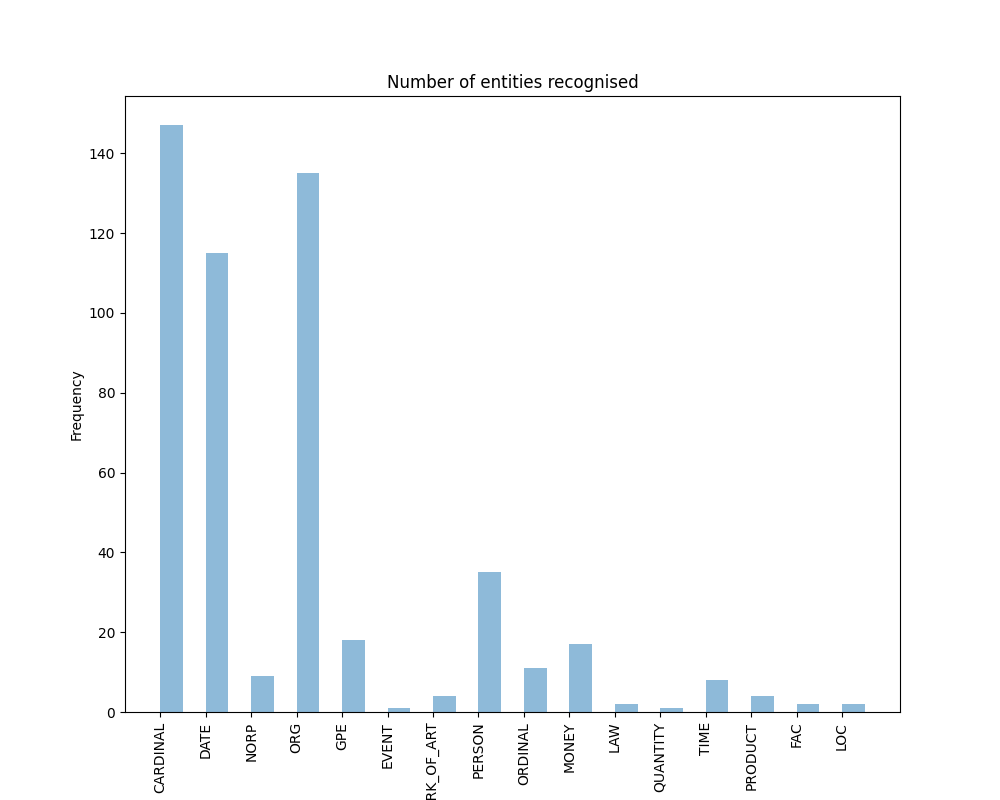

In [2]:
%matplotlib widget
# import necessary libraries
import spacy
import matplotlib.pyplot as plt
from itertools import groupby, zip_longest

entities = {}
entity_count = {}
TWEET_AMOUNT = 1000

# load a pre-trained English language model from spacy library
nlp = spacy.load("en_core_web_sm")

for doc in nlp.pipe(tweets_list[:TWEET_AMOUNT], disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']):
    # Add all identified entities to a list, and store those under their label in the entities dictionary, no duplicates.
    # e.g entities['ORG'] = ['Apple', 'Dell']
    temp = {key: list(set(map(lambda x: str(x), g))) for key, g in groupby(sorted(doc.ents, key=lambda x: x.label_), lambda x: x.label_)}
    for key, value in temp.items():
        if key in entities.keys():
            entities[key] += value
            entity_count[key] += len(value)
        else:
            entities[key] = value
            entity_count[key] = len(value)

entity_lists = [set(entities[key]) for key in entities.keys()]

# Merge the lists of entities which are columns together, to create rows for the csv file
entity_rows = zip_longest(*entity_lists, fillvalue=" ")
entity_rows = [*entity_rows]

# Write list of recognised entities to a csv file in columns under their label
with open('entities_recognised(en_core_web_sm).csv', 'w', encoding='utf-8', newline='') as out:
    csv_out = csv.writer(out, delimiter=',', skipinitialspace=True)
    csv_out.writerow([key for key in entities.keys()])
    for row in entity_rows:
        csv_out.writerow(row)


#Display Metrics of entities recognised
entity_labels = list(entities.keys())
entity_counts = list(entity_count.values())

plt.figure(figsize=(10,8))
plt.bar(entity_labels, entity_counts, align='edge', alpha=0.5, width=0.5)
plt.xticks(entity_labels,entity_labels, rotation='vertical')
plt.ylabel('Frequency')
plt.title('Number of entities recognised')

plt.show()

## Run Spacey Accuracy Pipeline with Labelled Tweets Dataset

Text(0.5, 1.0, 'Number of entities recognised')

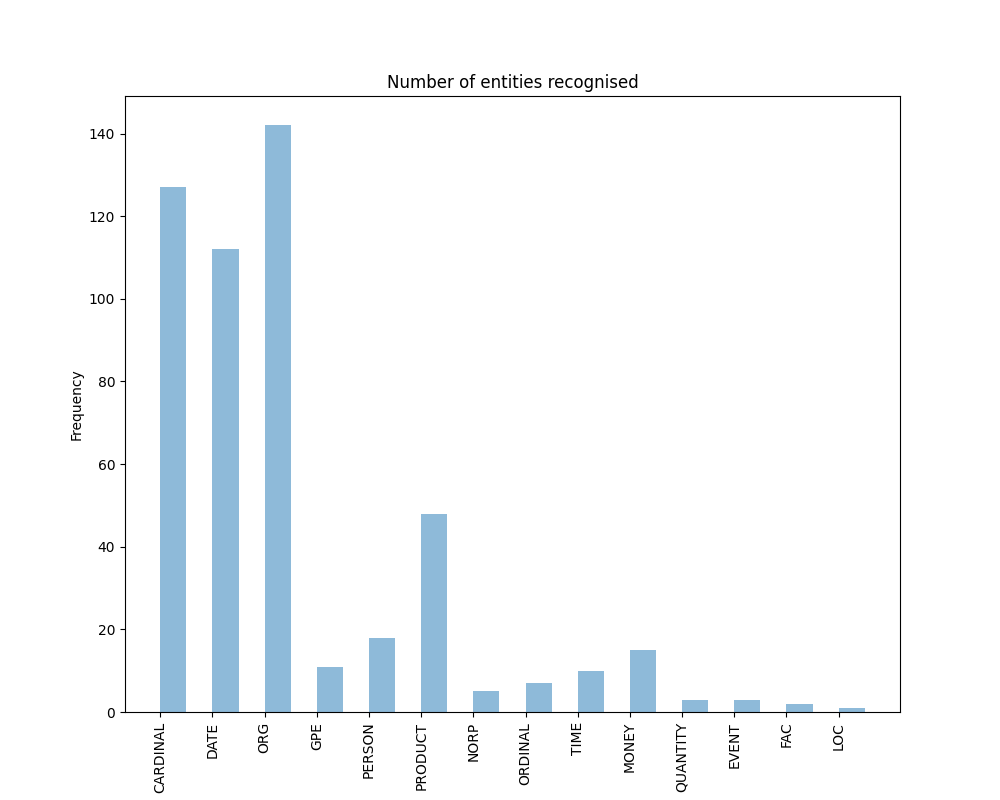

In [3]:
%matplotlib widget
# import necessary libraries
import spacy
import matplotlib.pyplot as plt
from itertools import groupby, zip_longest

entities = {}
entity_count = {}
TWEET_AMOUNT = 1000

# load a pre-trained English language model from spacy library
nlp = spacy.load("en_core_web_trf")

for doc in nlp.pipe(tweets_list[:TWEET_AMOUNT], disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']):
    # Add all identified entities to a list, and store those under their label in the entities dictionary, no duplicates.
    # e.g entities['ORG'] = ['Apple', 'Dell']
    temp = {key: list(set(map(lambda x: str(x), g))) for key, g in groupby(sorted(doc.ents, key=lambda x: x.label_), lambda x: x.label_)}
    for key, value in temp.items():
        if key in entities.keys():
            entities[key] += value
            entity_count[key] += len(value)
        else:
            entities[key] = value
            entity_count[key] = len(value)

entity_lists = [set(entities[key]) for key in entities.keys()]

# Merge the lists of entities which are columns, together, to create rows for the csv file
entity_rows = zip_longest(*entity_lists, fillvalue=" ")
entity_rows = [*entity_rows]

# Write list of recognised entities to a csv file in columns under their label
with open('entities_recognised(en_core_web_trf).csv','w') as out:
    csv_out=csv.writer(out, delimiter=',', skipinitialspace=True)
    csv_out.writerow([key for key in entities.keys()])
    for row in entity_rows:
        csv_out.writerow(row)

#Display Metrics of entities recognised
entity_labels = list(entities.keys())
entity_counts = list(entity_count.values())

plt.figure(figsize=(10,8))
plt.bar(entity_labels, entity_counts, align='edge', alpha=0.5, width=0.5)
plt.xticks(entity_labels,entity_labels, rotation='vertical')
plt.ylabel('Frequency')
plt.title('Number of entities recognised')